<a href="https://colab.research.google.com/github/eugenioRSJ/EstudoCienciaDeDados/blob/main/introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 15.5MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


#Analisando notas em geral

In [ ]:
import pandas as pd

In [ ]:
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#formato dos campos
notas.shape

(100836, 4)

In [ ]:
#alterando nomes das colunas
notas.columns = ["UsuarioId", "FilmeId", "Nota", "Momentos"]
notas.head()

,UsuarioId,FilmeId,Nota,Momentos
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas["Nota"] #isso é uma serie

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Nota, Length: 100836, dtype: float64

In [ ]:
#devolve os diferentes valores existentes na serie
notas["Nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
#contando os valores
notas["Nota"].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: Nota, dtype: int64

In [ ]:
#media das notas
print("Media = ", notas["Nota"].mean())
#qual valor divide os maiores dos menores
print("Mediana = ", notas["Nota"].median())
#obtedo diversas medidas
print(notas.Nota.describe())

Media =  3.501556983616962
Mediana =  3.5
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64


Visualizando dados
Pode ser o dataframe ou colunas especificas
```
# Isto está formatado como código
```



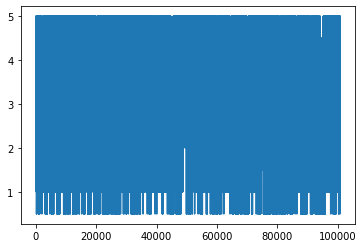

In [ ]:
#isso não conta nada
notas.Nota.plot()

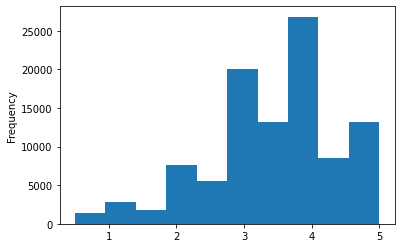

In [ ]:
#melhorando
notas.Nota.plot(kind="hist")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


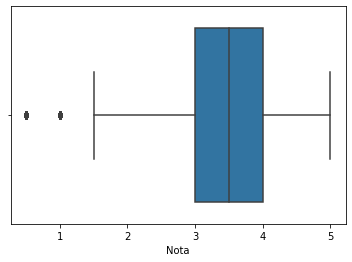

In [ ]:
import seaborn as sns
sns.boxplot(notas.Nota)
#a maioria(50%) das notas está entre 3 e 4
#a mediana é 3,5
#25% da notas entre 4 e 5
#25% da notas entre 1,5 e 3
#poucos dão entre 0,5 e 1,5

# Um pouco sobre a análise exploratória dos dados
Analisando os filmes


In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["FilmeId", "Titulo", "Generos"]

In [ ]:
filmes.head()

,FilmeId,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando notas especificas por filmes

In [ ]:
#fazendo perguntas as notas
notas.query("FilmeId == 1").Nota.mean()

3.9209302325581397

In [ ]:
#Agrupando dados e executando a média
medias_por_filme = notas.groupby("FilmeId").mean()["Nota"]

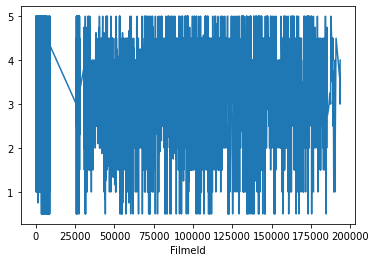

In [ ]:
medias_por_filme.plot()

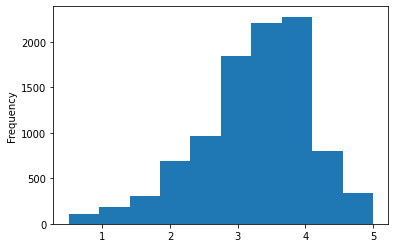

In [ ]:
medias_por_filme.plot(kind="hist")

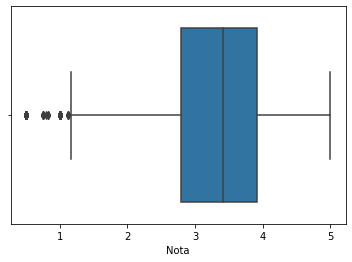

In [ ]:
sns.boxplot(medias_por_filme)

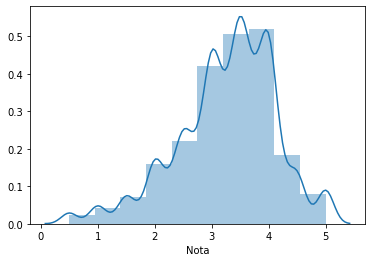

In [ ]:
#boxplot sns
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histogramas das medias dos filmes')

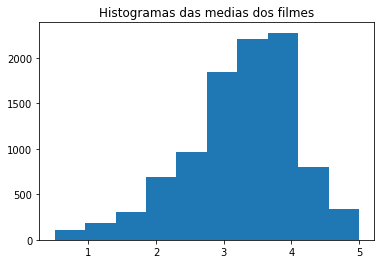

In [ ]:
#biblioteca por trás
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histogramas das medias dos filmes")

#Variaveis

In [ ]:
tmdb=pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
#variavel categorica nominal
tmdb.original_language.unique()

#Primeiro grau < segundo grau < terceiro grau = varivél categorica ordinal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
#buhuet => orcamento => quantitativo continuo(infinitos valores entre 0 e 1)
#quantidade de votos => quantitativo discreta ou intervalar

#DATA VISUALIZATION
como extrair informações de variavéis categoricas

Categoricas nominais

In [ ]:
#posso querer comparar as categorias ex: quantidade de vezes que aparece

In [ ]:
#contando quantas vezes aparece #to_frame transofrma a serie em df #reset_index tranforma o indice anterior em uma coluna
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


0.9.0


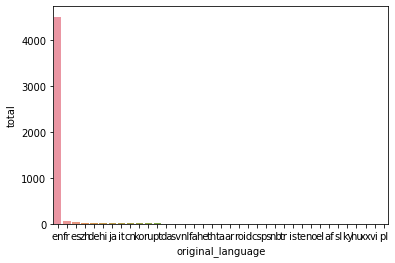

In [ ]:
#plots de categorias (pesquisar pois existem diversos)
sns.barplot(data=contagem_de_lingua, x="original_language", y="total")
print(sns.__version__)

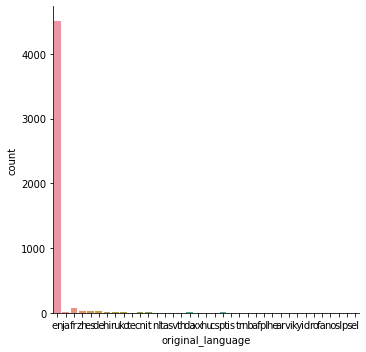

In [ ]:
#mais alto nível
sns.catplot(x="original_language", data=tmdb, kind="count")

Pensando na mensagem através de visualização

([<matplotlib.patches.Wedge at 0x7f1c7aa88a20>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

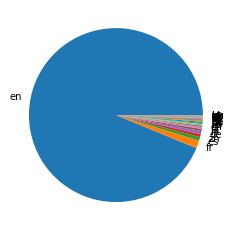

In [ ]:
#esse gráfico não é indicado em quase nenhuma ocasião, pois é muito dificil entender a diferença de áreas
#pie(numeros, labels)
plt.pie(contagem_de_lingua.total, labels=contagem_de_lingua.original_language)

In [ ]:
#deve-se focar na mensagem, já sei que o inglês se destaca uma opção agora é comparar o ingles com cada lingua
total_por_lingua = tmdb.original_language.value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']

total_do_resto = total_geral - total_ingles
total_do_resto

298

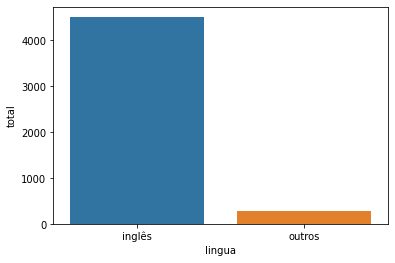

In [ ]:
dados = {
    'lingua' : ['inglês', 'outros'],
    'total': [total_ingles, total_do_resto]
}
dados= pd.DataFrame(dados)
sns.barplot(x=dados.lingua, y=dados.total, data=dados)

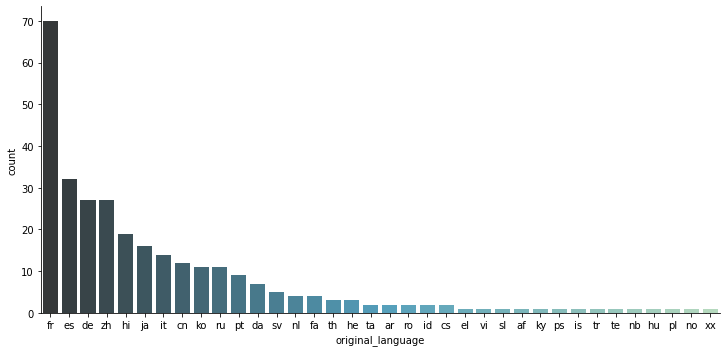

In [ ]:
#aspect = quadrado, dobro disso
#palette = define um modo de exibição de cores
filmes_por_lingua_sem_ingles=tmdb.query("original_language != 'en'")
total_por_lingua_sem_ingles=tmdb.query("original_language != 'en'").original_language.value_counts()
sns.catplot(x="original_language", data=filmes_por_lingua_sem_ingles, kind="count", 
            aspect=2, order=total_por_lingua_sem_ingles.index,
            palette='GnBu_d')

#Média, mediana, desvio padrão, boxplot, histograma, tendência central e dispersão, como tudo isso se encaixa

In [ ]:
#analizando filmes especificos
filmes.head(2)

,FilmeId,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas_do_toy_story=notas.query("FilmeId == 1")
notas_do_jumanji=notas.query("FilmeId == 2")
print(len(notas_do_toy_story), len(notas_do_jumanji))
notas_do_toy_story

215 110


,UsuarioId,FilmeId,Nota,Momentos
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
#média, mediana, moda não diz muito quantas pessoas amaram ou odiaram o filme se a diferença é grande ou pequena
#procuram saber para onde está o centro
print("Nota média do Toy Story %.2f" % notas_do_toy_story.Nota.mean())
print("Notas média do Jumanji %.2f" % notas_do_jumanji.Nota.mean())

Nota média do Toy Story 3.92
Notas média do Jumanji 3.43


In [ ]:
print("Nota médiana do Toy Story %.2f" % notas_do_toy_story.Nota.median())
print("Notas médiana do Jumanji %.2f" % notas_do_jumanji.Nota.median())

Nota médiana do Toy Story 4.00
Notas médiana do Jumanji 3.50


In [ ]:
#fato curisono
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
#resumimos todas as informações e chegamos a um mesmo valor
#como assim, a mesma informação, nós sabemos que os dois filmes são reações diferentes o segundo estão amando ou odiando
#o outro é diferente
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

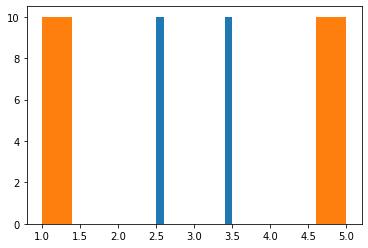

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c71a2cf28>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1c71a3f978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c71a4a438>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c71a4a0b8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c71a3f278>,
  <matplotlib.lines.Line2D at 0x7f1c71a4ae48>]}

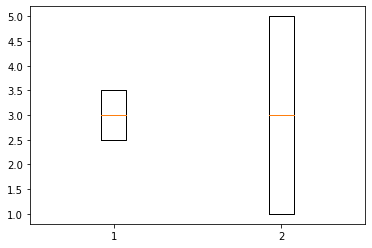

In [ ]:
plt.boxplot([filme1, filme2])

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f1c7180a438>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1c7180ae10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c718168d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c71816550>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c7180a710>,
  <matplotlib.lines.Line2D at 0x7f1c717a0390>]}

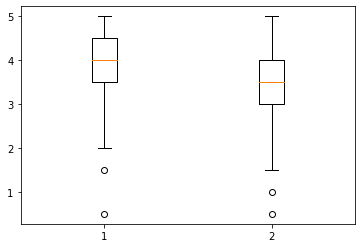

In [ ]:
plt.boxplot([notas_do_toy_story.Nota, notas_do_jumanji.Nota])

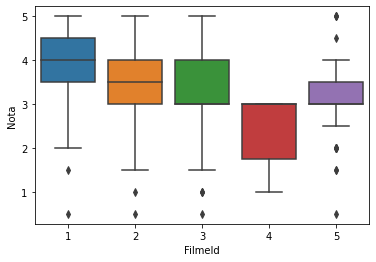

In [ ]:
sns.boxplot(x="FilmeId", y="Nota", data = notas.query("FilmeId in (1,2,3, 4, 5)"))
#para saber o quanto os dados estão longe da mediana ou do centro calculamos o desvio padrão

In [ ]:
#desvio padrão e média contam uma história melhor
notas_do_toy_story.Nota.std()
#Depois da exploração dos dados temos que testar e saber se os dados são representativos, se realmente o quue os dados estão falando é o que de fato acontece
#Teste estatisticos

0.8348591407114045